**TODO**
1. Написать когда по 4 сигналам прогнозируем 5ый. 

In [11]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from importlib import reload

import pickle
from zipfile import ZipFile


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


import random
def set_determenistic(seed=777,precision=10):
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.set_printoptions(precision=precision)

set_determenistic()

cuda:0


# Download dataset and preprocessing

In [12]:
if os.path.exists('./data'):
    pass
else:
    os.mkdir('./data')
# ===============================================
if os.path.exists('./data/household_power_consumption.txt'):
    pass
else:
    os.system('curl  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip --output ./data/household_power_consumption.zip')
    with ZipFile('./data/household_power_consumption.zip', 'r') as zipObj:
        zipObj.extractall('./data')
    os.remove('./data/household_power_consumption.zip')
# =============================================== 


In [13]:
%%time
if os.path.exists('./data/df.pcl'):
    with open('./data/df.pcl', 'rb') as f:
        df = pickle.load(f)
else:
    data_path = './data/'
    df = pd.read_csv(data_path+'household_power_consumption.txt',sep=';')
    df['Datetime'] = df['Date']+ ' ' + df['Time']
    df.index = pd.to_datetime(df['Datetime'])
    df = df.drop(['Date','Time','Datetime'],1)

    for col in df:
        df[col]=pd.to_numeric(df[col], errors='coerce')
    df = df.dropna()
    df.head(3)
    dff  = df.copy()
    df= dff[:1495]
    with open('./data/df.pcl', 'wb') as f:
        pickle.dump(df, f)

Wall time: 911 µs


In [67]:
# import sys
# sys.path.insert(1, './DL_anomaly_detection')
from tsad_test import main, models,src#
src = reload(src)
models = reload(models)
# generate_residuals = reload(generate_residuals)

# stastics = reload(stastics)
main = reload(main)

In [68]:
in_features = df.shape[1]

from tsad import  models
lstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=1) 
deepLstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=2) 
blstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=1,bidirectional=True)

lstmAe = models.SimpleLSTM(in_features=in_features,n_hidden=int(in_features*3/4),n_layers=1)




C:\Users\kompn\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [69]:
dfs = df.copy()
a = main.DL_AD()

In [70]:
# model = SimpleLSTM(dfs.shape[1],dfs.shape[1],2,bidirectional=True).to(device)

In [ ]:
# 

Epoch: 01
	Train Loss: 0.028
	 Val. Loss: 0.028 
Epoch: 02
	Train Loss: 0.027
	 Val. Loss: 0.028 
Epoch: 03
	Train Loss: 0.027
	 Val. Loss: 0.028 
Epoch: 04
	Train Loss: 0.026
	 Val. Loss: 0.028 
Epoch: 05
	Train Loss: 0.026
	 Val. Loss: 0.027 
Epoch: 06
	Train Loss: 0.026
	 Val. Loss: 0.027 
Epoch: 07
	Train Loss: 0.026
	 Val. Loss: 0.027 
Epoch: 08
	Train Loss: 0.026
	 Val. Loss: 0.027 

Test Loss: 0.032


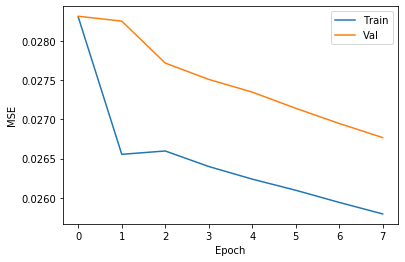

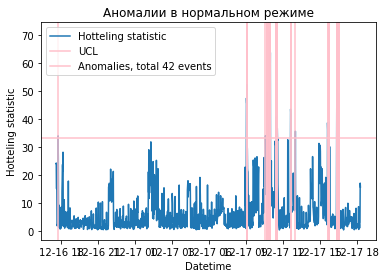

In [78]:
dd = a.fit(dfs,n_epochs=8,model=lstm,encod_decode_model=True,points_ahead=1)

In [51]:
a = torch.tensor(np.arange(1000).reshape(20,5,10))

In [52]:
a[:,0,:]

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
        [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
        [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
        [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
        [200, 201, 202, 203, 204, 205, 206, 207, 208, 209],
        [250, 251, 252, 253, 254, 255, 256, 257, 258, 259],
        [300, 301, 302, 303, 304, 305, 306, 307, 308, 309],
        [350, 351, 352, 353, 354, 355, 356, 357, 358, 359],
        [400, 401, 402, 403, 404, 405, 406, 407, 408, 409],
        [450, 451, 452, 453, 454, 455, 456, 457, 458, 459],
        [500, 501, 502, 503, 504, 505, 506, 507, 508, 509],
        [550, 551, 552, 553, 554, 555, 556, 557, 558, 559],
        [600, 601, 602, 603, 604, 605, 606, 607, 608, 609],
        [650, 651, 652, 653, 654, 655, 656, 657, 658, 659],
        [700, 701, 702, 703, 704, 705, 706, 707, 708, 709],
        [750, 751, 752, 753, 754, 755, 756, 757, 758, 759],
        [800, 801, 802, 803, 804, 805, 8

In [63]:
list(range(9,-1,-1))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [59]:
list(range(0,10,-1))

[]

In [64]:
b = torch.cat([a[:,i,:].unsqueeze(1) for i in range(a.shape[1]-1,-1,-1)],1)

In [66]:
b[:,-1,:]

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9],
        [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
        [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
        [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
        [200, 201, 202, 203, 204, 205, 206, 207, 208, 209],
        [250, 251, 252, 253, 254, 255, 256, 257, 258, 259],
        [300, 301, 302, 303, 304, 305, 306, 307, 308, 309],
        [350, 351, 352, 353, 354, 355, 356, 357, 358, 359],
        [400, 401, 402, 403, 404, 405, 406, 407, 408, 409],
        [450, 451, 452, 453, 454, 455, 456, 457, 458, 459],
        [500, 501, 502, 503, 504, 505, 506, 507, 508, 509],
        [550, 551, 552, 553, 554, 555, 556, 557, 558, 559],
        [600, 601, 602, 603, 604, 605, 606, 607, 608, 609],
        [650, 651, 652, 653, 654, 655, 656, 657, 658, 659],
        [700, 701, 702, 703, 704, 705, 706, 707, 708, 709],
        [750, 751, 752, 753, 754, 755, 756, 757, 758, 759],
        [800, 801, 802, 803, 804, 805, 8

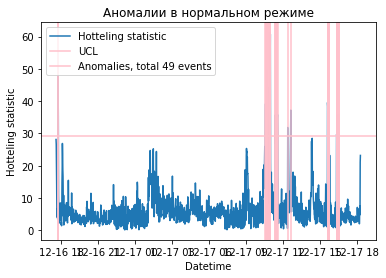

In [9]:
b= a.predict_anomaly(dfs)

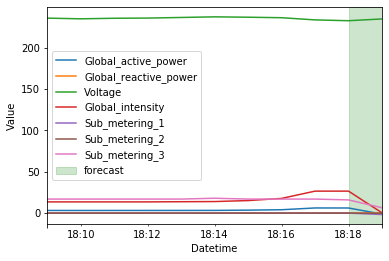

In [10]:
b= a.forecast(dfs)